In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori 
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Importing warnings to not get warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the datset
data = pd.read_csv(r"C:\Users\Shashi\Model Building\Unsupervised Learning or Descriptive Model\Association Rules\my_movies.csv")

In [4]:
#Checking the head of data,which represent the top 5 rows.
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
# Checking the datatypes of data
data.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [6]:
# 1st Business Moment : Measures of Central Tendency
# calculating the Mean, Median, Mode.
data.mean()

Sixth Sense      0.6
Gladiator        0.7
LOTR1            0.2
Harry Potter1    0.2
Patriot          0.6
LOTR2            0.2
Harry Potter2    0.1
LOTR             0.1
Braveheart       0.1
Green Mile       0.2
dtype: float64

In [7]:
data.mode()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Gladiator,Patriot,Sixth Sense,Green Mile,LOTR2,1,1,0,0,1,0,0,0,0,0


In [8]:
data.median()

Sixth Sense      1.0
Gladiator        1.0
LOTR1            0.0
Harry Potter1    0.0
Patriot          1.0
LOTR2            0.0
Harry Potter2    0.0
LOTR             0.0
Braveheart       0.0
Green Mile       0.0
dtype: float64

In [9]:
# 2nd Business Moment : Measures of Disperstion 
# Checking the Variance, Standard Deviation.
data.var()

Sixth Sense      0.266667
Gladiator        0.233333
LOTR1            0.177778
Harry Potter1    0.177778
Patriot          0.266667
LOTR2            0.177778
Harry Potter2    0.100000
LOTR             0.100000
Braveheart       0.100000
Green Mile       0.177778
dtype: float64

In [10]:
data.std()

Sixth Sense      0.516398
Gladiator        0.483046
LOTR1            0.421637
Harry Potter1    0.421637
Patriot          0.516398
LOTR2            0.421637
Harry Potter2    0.316228
LOTR             0.316228
Braveheart       0.316228
Green Mile       0.421637
dtype: float64

In [11]:
# 3rd Business Moment : Measures of Skewness 
data.skew()

Sixth Sense     -0.484123
Gladiator       -1.035098
LOTR1            1.778781
Harry Potter1    1.778781
Patriot         -0.484123
LOTR2            1.778781
Harry Potter2    3.162278
LOTR             3.162278
Braveheart       3.162278
Green Mile       1.778781
dtype: float64

In [12]:
# 4th Business Moment : Measures of Kurtisos 
data.kurt()

Sixth Sense      -2.276786
Gladiator        -1.224490
LOTR1             1.406250
Harry Potter1     1.406250
Patriot          -2.276786
LOTR2             1.406250
Harry Potter2    10.000000
LOTR             10.000000
Braveheart       10.000000
Green Mile        1.406250
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c0baaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3c7790d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c0ba820>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3c779670>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3c779940>],
 'means': []}

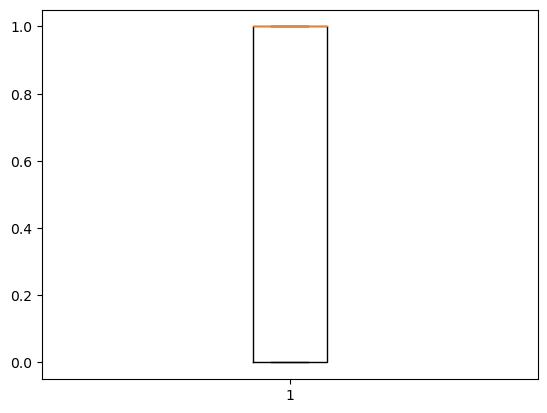

In [13]:
# Graphical Representation & Checking the Outliers of data.
plt.boxplot(data['Sixth Sense'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c99cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3c7ab520>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c99cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3c7aba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3c7abd60>],
 'means': []}

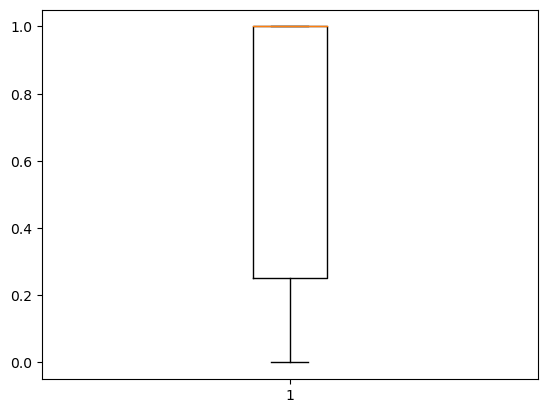

In [14]:
plt.boxplot(data['Gladiator'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c8135b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3c813b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c8132e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3c81e130>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3c81e400>],
 'means': []}

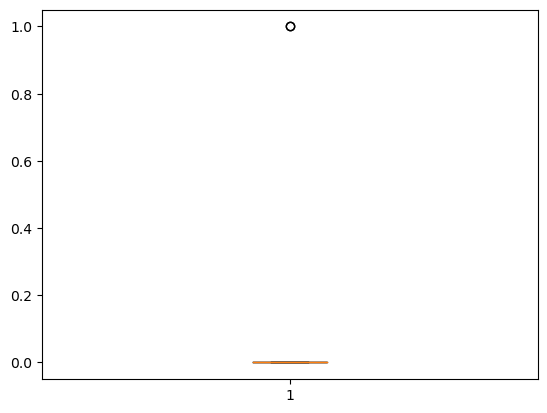

In [15]:
plt.boxplot(data['LOTR1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c87e190>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3c87e760>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c86ee80>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3c87ed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3c87efd0>],
 'means': []}

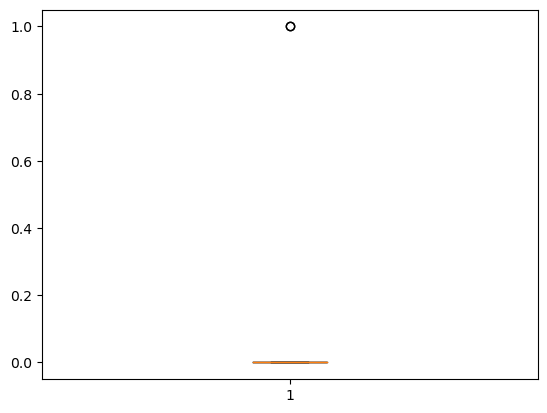

In [16]:
plt.boxplot(data['Harry Potter1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c8de8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3c8dee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c8de5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3c9ae430>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3c9ae700>],
 'means': []}

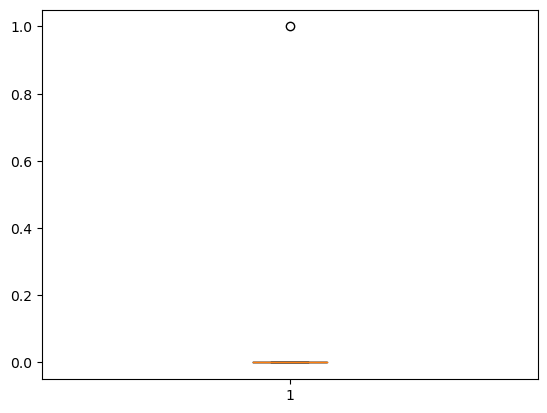

In [17]:
plt.boxplot(data['LOTR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3c9ffd60>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3ca0d340>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3c9ffa90>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3ca0d8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3ca0dbb0>],
 'means': []}

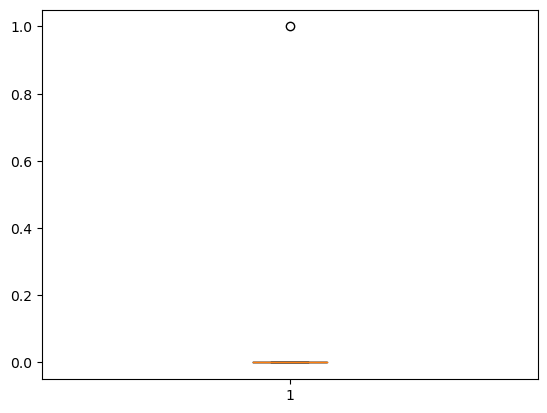

In [18]:
plt.boxplot(data['Braveheart'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29b3ca2f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x29b3ca2f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x29b3cb9fee0>],
 'medians': [<matplotlib.lines.Line2D at 0x29b3ca2fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x29b3ca3c040>],
 'means': []}

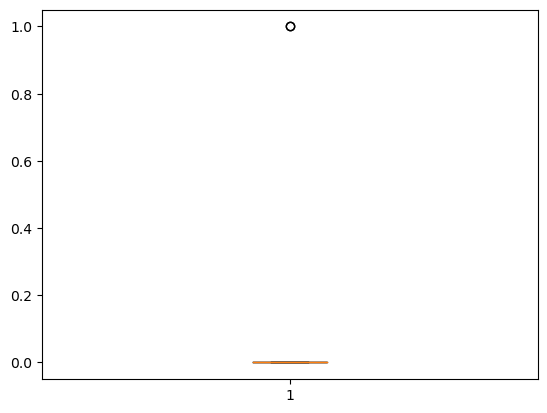

In [19]:
plt.boxplot(data['Green Mile'])

In [20]:
# Cleaning of Outliers we use Winsorizer
from feature_engine.outliers import Winsorizer

In [21]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('Green Mile'))

data_iqr = winsor_iqr.fit_transform(data[['Green Mile']])

sns.boxplot(data_iqr['Green Mile'])

ValueError: Input columns ['Green Mile'] have low variation for method 'iqr'. Try other capping methods or drop these columns.

In [ ]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('Braveheart'))

data_iqr = winsor_iqr.fit_transform(data[['Braveheart']])

sns.boxplot(data_iqr['Braveheart'])

In [ ]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('LOTR'))

data_iqr = winsor_iqr.fit_transform(data[['LOTR']])

sns.boxplot(data_iqr['LOTR'])

In [ ]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('Harry Potter1'))

data_iqr = winsor_iqr.fit_transform(data[['Harry Potter1']])

sns.boxplot(data_iqr['Harry Potter1'])

In [ ]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                           tail = 'both',
                            fold = 1.5,
                             variables = ('LOTR1'))

data_iqr = winsor_iqr.fit_transform(data[['LOTR1']])

sns.boxplot(data_iqr['LOTR1'])

In [ ]:
# Checking the duplicates in data
duplicates = data.duplicated()
sum(duplicates)

In [ ]:
# Removing the duplicates in data with drop fun
data.drop_duplicates(keep = 'last', inplace = True)

In [ ]:
duplicates = data.duplicated()
sum(duplicates)

In [ ]:
# Checking the Missing Values
data.isna().sum()

In [ ]:
data_cat = data.select_dtypes(exclude = [np.number])
data_num = data.select_dtypes(include = [np.number])

In [ ]:
data_cat['V3'].fillna(method = 'ffill', inplace = True)

In [ ]:
data_cat['V4'].fillna(data_cat['V4'].mean, inplace = True)

In [ ]:
data_cat['V5'].fillna(method = 'ffill', inplace = True)

In [ ]:
data_cat.isna().sum()

In [ ]:
data_cat = pd.DataFrame(data_cat)

In [ ]:
duplicate = data.duplicated()
sum(duplicate)

In [ ]:
data.drop_duplicates(keep = False )

In [ ]:
duplicate = data.duplicated()
sum(duplicate)

In [ ]:
data_num = pd.DataFrame(data_num)

In [ ]:
data = pd.concat((data_cat, data_num), axis = 1)

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [ ]:
data_norm = pd.DataFrame(data)

In [ ]:
data_norm.describe()

In [ ]:
df = data.iloc[:,5:]

In [ ]:
frequent_item = apriori(df, min_support = 0.0075, max_len = 4, use_colnames = True)
frequent_item

In [ ]:
frequent_item.sort_values('support', ascending = False, inplace = True)
frequent_item

In [ ]:
rule = association_rules(frequent_item, metric = 'lift')
rule

In [ ]:
rule.sort_values('lift', ascending = False).head(10)